# Advanced Python features

## 1. Built-in features: Lambda, Map, Filters, Zip, Generators

### Lambda functions
A Lambda Function is a small, anonymous function — anonymous, meaning here that it doesn't really have a name.
Python functions are usually defined using the style of def XXX() , but with lambda functions we don’t need to give a name. Lambda functions are generally used to perform simple expressions / operations without the need of fully defining a new functions. 

A lambda function can take any number of arguments, but must always have only one expression.

In [3]:
x= lambda a, b, c : a * b *c
print(x(5, 6, 7)) 

x = lambda a : a*2 + 2
print(x(3))

210
8


It is usually used to perform basic math operations, and allows to write simpler / cleaner python code.

### Map
Map is a built-in Python function used to apply a function to a sequence of elements like a list or dictionary. It provides a more readable way to perform such an operation.

In [12]:
def square_function(a):
    return a * a

x = map(square_function, [1, 2, 3])
print(x) 
print(list(x))

def item_item_multiplier(a, b):
    return a * b

x = map(item_item_multiplier, [1, 4, 7, 9], [2, 5, 8, 4])
print(x)
print(list(x))

[1, 4, 9]
[2, 20, 56, 36]


By using map we can apply our functions to a single list or multiple lists. Note that the map function returns a map object type. To display its content we need to convert it to a list.

### Filtering
The filter built-in function is  similar to the Map function, it allows to apply a function to a sequence (list, tuple, dictionary). The key difference is that filter() will only returns the elements for which the applied function returns True.

In [14]:
# Our numbers
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

def filter_odd_numbers(num):
    if num % 2 == 0:
        return True
    else:
        return False

filtered_numbers = filter(filter_odd_numbers, numbers)

print(filtered_numbers)  
print(list(filtered_numbers))

[2, 4, 6, 8, 10, 12, 14]


The filtering function evaluates the output of the function on each item (True or False) and then returns the items of the list for which the function returns True. 

### Zip

Zip makes an iterator that aggregates elements from each of the iterables.

It returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables. The iterator stops when the shortest input iterable is exhausted. With a single iterable argument, it returns an iterator of 1-tuples

In [16]:
x = [1, 2, 3]
y = [4, 5, 6]
zipped = zip(x, y)
list(zipped)

[(1, 4), (2, 5), (3, 6)]

Zip is convenient to iterate over several lists in parallel. Zip is also frequently combined with the built-in function enumerate to iterate over two lists and their indices:

In [18]:
alist = ['a1', 'a2', 'a3']
blist = ['b1', 'b2', 'b3']

for i, (a, b) in enumerate(zip(alist, blist)):
    print(i, a, b)

0 a1 b1
1 a2 b2
2 a3 b3


### Generators

#### How to create a generator in Python?

Python generators are a simple way of creating iterators. A simple definition of generator is a function that returns an object (iterator) which we can iterate over (one value at a time)

Creating a python generator is as easy as defining a normal function with yield statement instead of a return statement.

If a function contains at least one yield statement (it may contain other yield or return statements), it becomes a generator function. Both yield and return will return some value from a function. The difference is that, while a return statement terminates a function entirely, yield statement pauses the function saving all its states and later continues from there on successive calls.

#### Differences between Generator function and a Normal function

- Generator function contains one or more yield statement.
- Generators return an object (iterator) but does not start execution immediately.
- Once the function yields, the function is paused and the control is transferred to the caller.
- Local variables and their states are remembered between successive calls.
- When the function terminates, StopIteration is raised automatically on further calls.

In [3]:
def my_generator():
    n = 10
    print('First print')
    # Generator function contains yield statements
    yield n

    n += 1
    print('Second print')
    yield n

    n += 1
    print('Third print')
    yield n
    
x=my_generator()
list(x)

    

First print
<generator object my_generator at 0x000002700ED6B8B8>
Second print
<generator object my_generator at 0x000002700ED6B8B8>
Third print
<generator object my_generator at 0x000002700ED6B8B8>


Generators allow interactive run of functions

In [4]:
x=my_generator()
next(x)

First print


10

In [5]:
next(x)

Second print


11

In [6]:
next(x)

Third print


12

We note that the value of variable n is remembered between each call. Unlike normal functions, the local variables are not destroyed when the function yields.

We can also use generators with for loops directly:

In [7]:
for z in my_generator():
    print(z)

First print
10
Second print
11
Third print
12


#### One of the main reasons Generators are used is that they are simple to implement, they make Python code faster, and they reduce memory usage. Below an example.

#### Normal approach to check even numbers

In [8]:
import memory_profiler
import time
def check_even(numbers):
    even = []
    for num in numbers:
        if num % 2 == 0: 
            even.append(num*num)
            
    return even
if __name__ == '__main__':
    m1 = memory_profiler.memory_usage()
    t1 = time.clock()
    cubes = check_even(range(50000000))
    t2 = time.clock()
    m2 = memory_profiler.memory_usage()
    time_diff = t2 - t1
    mem_diff = m2[0] - m1[0]
    print(f"It took {time_diff} Secs and {mem_diff} Mb to execute this method")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


It took 7.028311000000031 Secs and 965.82421875 Mb to execute this method


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


#### Using Generators 

In [13]:
import memory_profiler
import time
def check_even(numbers):
    for num in numbers:
        if num % 2 == 0:
            yield num * num 
    
if __name__ == '__main__':
    m1 = memory_profiler.memory_usage()
    t1 = time.clock()
    cubes = check_even(range(50000000))
    t2 = time.clock()
    m2 = memory_profiler.memory_usage()
    time_diff = t2 - t1
    mem_diff = m2[0] - m1[0]
    print(f"It took {time_diff} Secs and {mem_diff} Mb to execute this method")

It took 3.8499999845953425e-05 Secs and 0.0 Mb to execute this method


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


## 2. Importing financial data from Google, Bloomberg, or Quandl

### Importing data from Quandl

Quandl (https://www.quandl.com/) is a marketplace for economic and financial data. It contains a wide range of historical time series on most asset classes (Equity, Fixed Income, Commodities), as well as economic / alternative data. A Python API is available in order to directly pull data from Quandl.

Once you have created an account and got you account key, you just need to know the ticker of the underlying you need the data from. The python code would look like:

In [7]:
import quandl
df=quandl.get("EOD/DIS", authtoken="zbzphcQYstaEEmzXfs_F")
df.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,61.42,61.990,60.60,60.93,7016400.0,0.0,1.0,55.850686,56.369001,55.105040,55.405117,7016400.0
2013-09-04,60.92,61.220,60.52,61.11,14014600.0,0.0,1.0,55.396024,55.668821,55.032294,55.568796,14014600.0
2013-09-05,61.07,61.600,60.96,61.30,6356600.0,0.0,1.0,55.532423,56.014364,55.432397,55.741567,6356600.0
2013-09-06,61.47,61.830,60.63,61.39,7319400.0,0.0,1.0,55.896152,56.223509,55.132320,55.823406,7319400.0
2013-09-09,61.60,61.835,61.27,61.59,7224500.0,0.0,1.0,56.014364,56.228056,55.714288,56.005271,7224500.0


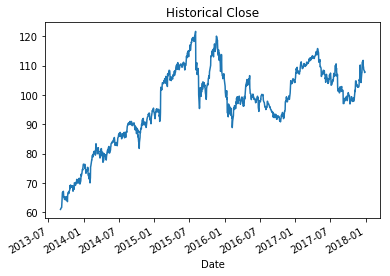

In [14]:
df["Close"].plot( title="Historical Close")

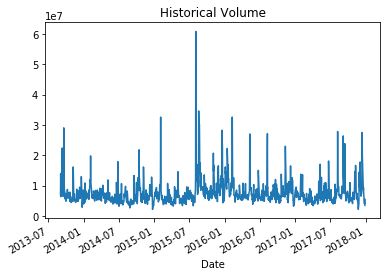

In [15]:
df["Volume"].plot( title="Historical Volume")

### Importing data from Bloomberg

Python API for Bloomberg actually calls the C++ API, so it is required to install both a Python package and the C++ SDK which is available here:

https://www.bloomberg.com/professional/support/api-library/

On Python package side, the official package is named blpapi, but other packages such as  pdblp allow to retrieve Bloomberg data in a simple way:

https://pypi.org/project/pdblp/

https://matthewgilbert.github.io/pdblp/tutorial.html



In [15]:
import pdblp
import pandas as pd
con = pdblp.BCon().start()

#df_db=pd.DataFrame(columns=["Date", "Underlying", "Instrument", "Ticker", "Field", "Value"])

ticker='CAXA2E1 CMAN Curncy'
field="5Y_ASK_CDS_SPREAD"
x=con.ref(ticker, field)
x

,ticker,field,value
0,CAXA2E1 CMAN Curncy,5Y_ASK_CDS_SPREAD,160.3841


Index(['date', 'ticker', 'field', 'value'], dtype='object')


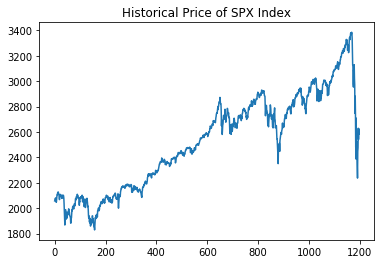

In [17]:
underlying='SPY US Equity'
underlying='SPX Index'
x=con.bdh(underlying, 'PX_LAST','20150629', '20200331', longdata=True)
print(x.columns)
x["value"].plot( title="Historical Price of "+underlying)
#x.to_csv("SP500.csv")

### Importing data from Google finance

We will directly use here a package called pandas_reader which allows to retrieve a pandas dataframe from a specificed ticker / source. Some examples of sources are available here:

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#moex-data

https://finance.yahoo.com/quote/%5EDJI/

For Google Finance data, you will need to use the 'stooq' source.

In [73]:
import pandas as pd
# package to extract data from various Internet sources into a DataFrame
# make sure you have it installed
#from pandas_datareader import data, wb
import pandas_datareader.data as web

# package for dates
import datetime as dt

ticker="^FCHI"
f = web.DataReader(ticker, 'stooq')
print(f.head(5))
#f["Close"].plot(title="Historical Close")

Empty DataFrame
Columns: []
Index: []


## 3. Building Interactive Dashboards in Jupyter

Interactive dashboards in Jupyter can be achievied by using the ipywidgets module. Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.

In [ ]:
import sys
!{sys.executable} -m pip install ipywidgets
#jupyter nbextension enable --py --sys-prefix widgetsnbextension  # can be skipped for notebook version 5.3 and above

To use the widget framework, you need to import ipywidgets.

In [18]:
import ipywidgets as widgets

Widgets have their own display repr which allows them to be displayed using IPython's display framework. Constructing and returning an IntSlider automatically displays the widget (as seen below). Widgets are displayed inside the output area below the code cell. Clearing cell output will also remove the widget.

In [19]:
widgets.IntSlider()

IntSlider(value=0)

In [21]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

#### Widget properties

In [22]:
w = widgets.IntSlider()
display(w)
w.value
w.value = 100

IntSlider(value=0)

In [66]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

#### Generating a text widget

In [23]:
widgets.Text(value='Hello World!', disabled=False)

Text(value='Hello World!')

#### Example: displaying a parametric function

In [24]:
import matplotlib.pyplot as plt
import math
import scipy.stats
from ipywidgets import interactive
import ipywidgets as widgets


def fexp(a,b,c,x):
    return a+b*x+c*x*x


def plotfunc(a, b, c):
    xrange=range(0,50)
    prices=[fexp(a,b,c,x) for x in xrange]
    plt.figure(figsize=(8,5)) # Initiate the graph
    plt.plot(xrange, prices, c='k', lw=3)
    plt.grid(True)
    plt.show()

y=interactive(plotfunc, a=(0, 10, 1), b=(0, 10, 1), c=(0, 10, 1))

display(y)

interactive(children=(IntSlider(value=5, description='a', max=10), IntSlider(value=5, description='b', max=10)…